In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
from problem import Domain, Fokker_Planck_1d
from my_utils import  plot_domain_2d, plot_2d_tri

[[ 0  1]
 [-2  2]]


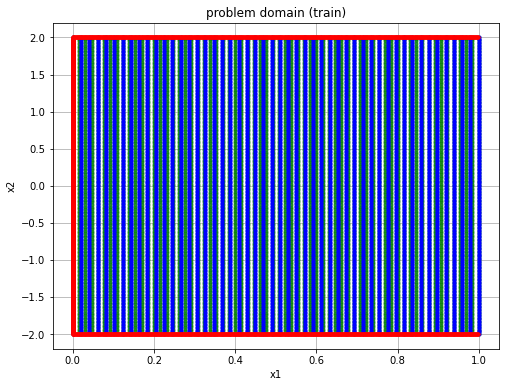

In [3]:
domain = Domain(domain_range=(0,1,-2,2),domain_shape='box')
print(domain.domain_range)
x_pde = domain.sample_domain_uniform(mesh_size=[50,200])
x_test = domain.sample_domain_uniform(mesh_size=[66,222])
x_bd = domain.sample_nd_mesh_bd(mesh_vec=[1000,1000])
x_bd = domain.shift2range(x_bd)
x_bd = x_bd[x_bd[:,0]<1]
plot_domain_2d(x_pde=x_pde,x_bd=x_bd,x_test=x_test)

pde rmse: 9.878446169606847e-17


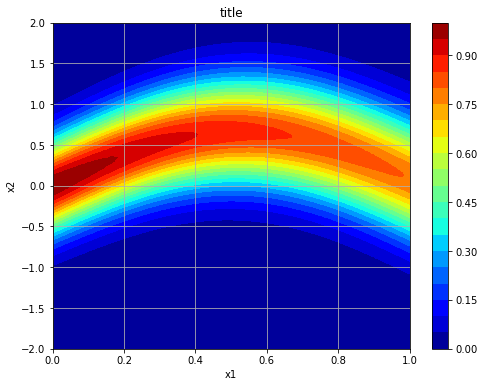

***************************************************
Fokker_Planck (case=None):
	x_pde:   	(10000, 2)
	x_bd:    	(2998, 2)
	x_ic:    	None
	x_test:    	(14652, 2)
***************************************************


In [4]:
my_prob = Fokker_Planck_1d()
x,u = my_prob.check_solution(x_pde)
plot_2d_tri(x[:,0], x[:,1], u[:,0],equal_ratio=False)
# rhs data
target_pde = my_prob.rhs(x_pde)
target_bd = my_prob.u_exact(x_bd)
target_test = my_prob.u_exact(x_test)

my_prob.set_data(x_pde=x_pde, x_test=x_test, x_bd=x_bd,
                 target_pde=target_pde, target_test=target_test, target_bd=target_bd)
print(my_prob)

In [5]:
np.savez('data/data', x_pde=x_pde, x_bd=x_bd, x_test=x_test,
         target_pde=target_pde, target_bd=target_bd, target_test=target_test)